In this lab today, we will run the kNN model to determine the best ‘k’ value in order to determine whether a wine is of high quality. 

Use the following features: ‘density’, ‘sulphates’, residual sugar’.

Please check 'k' values from 1 to 50 in order to determine the best value.

Below is starert code which obtains demo data from Amazon Web Services website:

In [197]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

test_idx = np.random.uniform(0, 1, len(df)) <= 0.7
train = df[test_idx==True]
test = df[test_idx==False]

features = ['density', 'sulphates', 'residual_sugar']

In [151]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0


In [152]:
# KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', \
                    # leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)[source]

X_train = train[['density', 'sulphates', 'residual_sugar']]
y_train = train['high_quality']

X = test[['density', 'sulphates', 'residual_sugar']]
y = test['high_quality']
    
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh_pred = neigh.predict(X)
neigh_pred
neigh.score(X,y)

0.79205851619644718

In [153]:
def best_k():
    k_scores = {}
    for i in range(1, 51, 1):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train, y_train)
        neigh.predict(X)
        score = neigh.score(X,y)
        k_scores.update({i: score})
    return k_scores

In [154]:
best_k()
best_k_value = best_k().values().index(max(best_k().values())) + 1
best_k_value

31

In [155]:
y_pred = neigh.predict(X)
print classification_report(y, y_pred)

             precision    recall  f1-score   support

        0.0       0.84      0.92      0.88      1553
        1.0       0.41      0.24      0.31       361

avg / total       0.76      0.79      0.77      1914



In [156]:
sum(neigh_pred)

213.0

In [157]:
k = []
accuracy_list = []
for i in range(1, 51):
    k.append(i)
for i in best_k().values():
    accuracy_list.append(i)

In [158]:
# Run with best k (n=2)
X_train = train[['density', 'sulphates', 'residual_sugar']]
y_train = train['high_quality']

X = test[['density', 'sulphates', 'residual_sugar']]
y = test['high_quality']
    
neigh = KNeighborsClassifier(n_neighbors=best_k_value)
neigh.fit(X_train, y_train)
pred_y = neigh.predict(X)
neigh.score(X,y)

0.81295715778474398

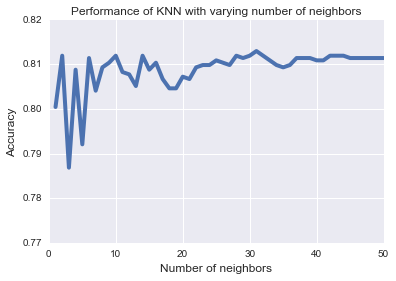

In [162]:
k = []
accuracy_list = []
for i in range(1, 51):
    k.append(i)
for i in best_k().values():
    accuracy_list.append(i)

plt.figure(figsize=[6,4])
plt.plot(k, accuracy_list, linewidth=4)
#plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 50.0])
plt.ylim([0.77, 0.82])
plt.xlabel('Number of neighbors', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Performance of KNN with varying number of neighbors', fontsize=12)
plt.legend(loc="lower right")
plt.show()

## GridSearchCV Method

In [164]:
param_dict = dict(n_neighbors=range(1, 31),\
                  weights=['uniform', 'distance'])

gscv = GridSearchCV(knn, param_dict, scoring='accuracy')

gscv_model = gscv.fit(X_train, y_train)
gscv_model.best_estimator_
gscv.best_params_
gscv_ypred = gscv.predict(X)

In [165]:
param_dict = dict(n_neighbors=range(1, 51), weights=['uniform', 'distance'])
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, param_dict, scoring='accuracy')
gscv_model = gscv.fit(X_train, y_train)
gscv_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=46, p=2,
           weights='uniform')

In [166]:
gscv.best_params_

{'n_neighbors': 46, 'weights': 'uniform'}

In [167]:
gscv_ypred = gscv.predict(X)
sum(gscv_ypred)

0.0

## Normalized features

In [188]:
print 'Summary for normalized features: '
print 'best_k_value: ', best_k_value
print 'Min normalized score: ', min(best_k(X_norm_train, y_norm_train, X_norm, y_norm).values())
print 'Min normalized score: ', max(best_k(X_norm_train, y_norm_train, X_norm, y_norm).values())
print 'Accuracy score with best_k_value', norm_best.score(X,y)

Summary for normalized features: 
best_k_value:  17
Min normalized score:  0.669278996865
Min normalized score:  0.816091954023
Accuracy score with best_k_value 0.811389759666


In [135]:
features

['density', 'sulphates', 'residual_sugar']

In [ ]:
train['d_norm'] = MinMaxScaler().fit_transform(train['density'])
train['s_norm'] = MinMaxScaler().fit_transform(train['sulphates'])
train['r_norm'] = MinMaxScaler().fit_transform(train['residual_sugar'])

test['d_norm'] = MinMaxScaler().fit_transform(test['density'])
test['s_norm'] = MinMaxScaler().fit_transform(test['sulphates'])
test['r_norm'] = MinMaxScaler().fit_transform(test['residual_sugar'])

In [171]:
X_norm_train = train[['d_norm', 's_norm', 'r_norm']]
y_norm_train = train['high_quality']

X_norm = test[['d_norm', 's_norm', 'r_norm']]
y_norm = test['high_quality']
    
norm = KNeighborsClassifier(n_neighbors=5)
norm.fit(X_norm, y_norm)
norm_pred = neigh.predict(X)
norm_pred
norm.score(X,y)

0.81138975966562177

In [175]:
def best_k(training_X, training_y, model_X, model_y):
    k_scores = {}
    for i in range(1, 51, 1):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(training_X, training_y)
        knn.predict(model_X)
        score = knn.score(model_X,model_y)
        k_scores.update({i: score})
    return k_scores

best_k(X_norm_train, y_norm_train, X_norm, y_norm)
best_k_value = best_k(X_norm_train, y_norm_train, X_norm, y_norm).values().\
index(max(best_k(X_norm_train, y_norm_train, X_norm, y_norm).values())) + 1
best_k_value

17

In [187]:
norm_best = KNeighborsClassifier(n_neighbors=best_k_value)
norm_best.fit(X_norm, y_norm)
norm_best_pred = neigh.predict(X)
norm_best.score(X,y)

0.81138975966562177

In [189]:
sum(norm_best_pred)

7.0

In [185]:
print 'Min normalized score: ', min(best_k(X_norm_train, y_norm_train, X_norm, y_norm).values())
print 'Min normalized score: ', max(best_k(X_norm_train, y_norm_train, X_norm, y_norm).values())

Min normalized score:  0.669278996865
Min normalized score:  0.816091954023


In [186]:
print classification_report(y_norm, norm_pred)

             precision    recall  f1-score   support

        0.0       0.81      1.00      0.90      1553
        1.0       0.71      0.01      0.03       361

avg / total       0.79      0.81      0.73      1914



In [195]:
conmat = np.array(confusion_matrix(y_norm, norm_best_pred, norm_best.classes_))
confusion = pd.DataFrame(conmat, index=norm_best.classes_,
                           columns=norm_best.classes_)

print(confusion)
print classification_report(y_norm, norm_best_pred)

      0.0  1.0
0.0  1551    2
1.0   356    5
             precision    recall  f1-score   support

        0.0       0.81      1.00      0.90      1553
        1.0       0.71      0.01      0.03       361

avg / total       0.79      0.81      0.73      1914



# Logistic Regression

In [199]:
Xlog_norm_train = train[['d_norm', 's_norm', 'r_norm']]
ylog_norm_train = train['high_quality']

Xlog = test[['d_norm', 's_norm', 'r_norm']]
ylog = test['high_quality']

logreg = LogisticRegression(solver='liblinear')
C_vals = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals},\
                  verbose=False, cv=15)
gs.fit(Xlog_norm_train, ylog_norm_train)
gs.best_params_

{'C': 5.0, 'penalty': 'l1'}

In [217]:
logreg_best = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
logreg_best_model = logreg_best.fit(Xlog_norm_train, ylog_norm_train)
logreg_best_pred = logreg_best_model.predict(Xlog)

In [218]:
cm_logreg = confusion_matrix(Xlog, logreg_best_pred, labels=logreg_best.classes_)
cm_logreg = pd.DataFrame(cm_logreg, columns=logreg_best.classes_, index=logreg_best.classes_)

ValueError: Can't handle mix of continuous-multioutput and binary

In [216]:
conmat = np.array(confusion_matrix(ylog, logreg_best_pred, logreg_best_model.classes_))
confusion = pd.DataFrame(conmat, index=logreg_best_model.classes_,
                           columns=logreg_best_model.classes_)

print(confusion)
print classification_report(ylog, logreg_best_model)

      0.0  1.0
0.0  1552    1
1.0   359    2


ValueError: Expected array-like (array or non-string sequence), got LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)